In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
dataset = pd.read_csv("dataset.csv")
print(dataset.head())
print("\Size dataset:", dataset.shape)

            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symp

In [21]:
all_symptoms_df = dataset[["Symptom_1","Symptom_2","Symptom_3","Symptom_4","Symptom_5", "Symptom_6", "Symptom_7","Symptom_8", "Symptom_9",
                           "Symptom_10", "Symptom_11", "Symptom_12", "Symptom_13", "Symptom_14", "Symptom_15", "Symptom_16", "Symptom_17"]]
X = pd.get_dummies(all_symptoms_df.apply(lambda x: ','.join(x.dropna()), axis=1).str.get_dummies(sep=','))

y = dataset["Disease"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy: 1.0


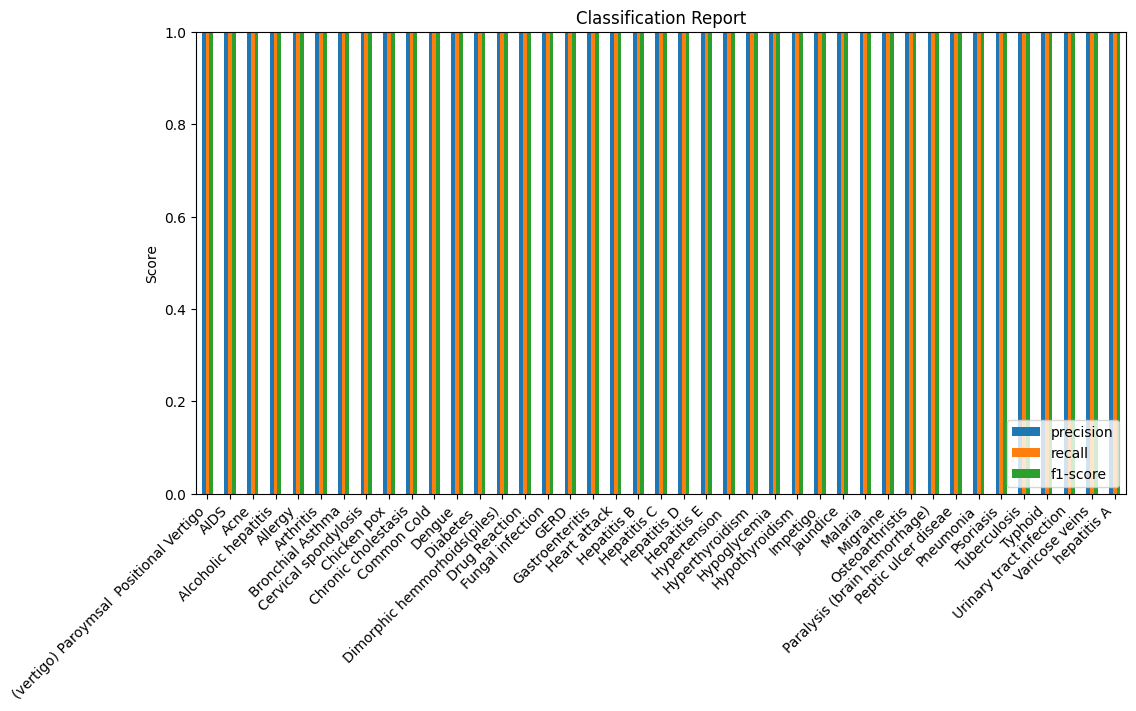


Confusion Matrix:
 [[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]


In [24]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

report_dict = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()
report_df = report_df.iloc[:-3, :]

report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12,6))
plt.title("Classification Report")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=45, ha="right")
plt.legend(loc='lower right')
plt.show()

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [25]:

user_input_str = input("Enter the symptoms separated by commas: ")
user_df = pd.DataFrame([user_input_str], columns=["Symptoms"])

user_encoded = user_df["Symptoms"].str.get_dummies(sep=',')
user_encoded = user_encoded.reindex(columns=X.columns, fill_value=0)

predicted_disease = clf.predict(user_encoded)[0]
print("\nPredicted disease:", predicted_disease)

Enter the symptoms separated by commas: itching,skin_rash,dischromic_patches

Predicted disease: Drug Reaction


In [26]:
symptom_desc = pd.read_csv("symptom_Description.csv")
symptom_prec = pd.read_csv("symptom_precaution.csv")

def show_disease_info(disease_name):
    desc = symptom_desc[symptom_desc["Disease"] == disease_name]["Description"].values[0]

    prec = symptom_prec[symptom_prec["Disease"] == disease_name].drop("Disease", axis=1).values[0]

    print("\Predicted disease:", disease_name)
    print("Description:", desc)
    print("\nPrecautions / recommendations:")
    for p in prec:
        print("-", p)

predicted_disease = clf.predict(user_encoded)[0]
show_disease_info(predicted_disease)

\Predicted disease: Drug Reaction
Description: An adverse drug reaction (ADR) is an injury caused by taking medication. ADRs may occur following a single dose or prolonged administration of a drug or result from the combination of two or more drugs.

Precautions / recommendations:
- stop irritation
- consult nearest hospital
- stop taking drug
- follow up


<>:9: SyntaxWarning: invalid escape sequence '\P'
<>:9: SyntaxWarning: invalid escape sequence '\P'
/tmp/ipython-input-4095794470.py:9: SyntaxWarning: invalid escape sequence '\P'
  print("\Predicted disease:", disease_name)
